# Clase 5: Análisis de Datos

- MyPersonality
- Vectores
  - Definición
  - Vectores en python
  - "Ploteando" vectores
  - Norma
  - Suma
  - Multiplicación por un escalar
  - Multiplicación por escalar
- Matrices
  - Matrices en Python
  - Indexando Matrices


# MyPersonality

El dataset MyPersonality generó mucha [controversia](https://www.businessinsider.com/facebook-investigates-mypersonality-app-in-new-data-scare-2018-5), ya que incluye información sensible de millones de personas y no siempre fue recolectada con consentimiento. Consiste en información del perfil y de actualizaciones de la red social Facebook, apareada con puntajes de rasgos de personalidad calculadas vía un cuestionario en la app. 

La prueba Big5 (Costa y Mac Crae 1985, Goldberg et al. 2006) es una taxonomía o clasificación de rasgos de personalidad que analiza la composición de cinco dimensiones de personalidad en su sentido más amplio. Esta disertación se publicó en el Psychological Review, 41, 1-32. Los cinco factores son:

- Apertura a la experiencia (inventivo / curioso vs. consistente / cauteloso) O  
- Escrupulosidad (eficiente / organizado vs. extravagante / descuidado) C  
- Extraversión (sociable / enérgico vs. solitario / reservado) E  
- Amabilidad (amigable / compasivo vs. desafiante / insensible) A  
- Neuroticismo (susceptible / nervioso vs. resistente / seguro) N

In [ ]:
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('https://unket.s3-sa-east-1.amazonaws.com/data/mypersonality.csv') ok_cupid_data.csv

In [ ]:
df['sEXT']

0       2.65
1       2.65
2       2.65
3       2.65
4       2.65
        ... 
9912    2.15
9913    4.05
9914    4.05
9915    1.40
9916    4.25
Name: sEXT, Length: 9917, dtype: float64

In [ ]:
df = df.drop_duplicates(subset='#AUTHID')

In [ ]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.10
102,318bf822d4f2bd3920367560218619c0,has bed bugs..... ewwwww!,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,06/27/09 11:21 PM,318.0,49024.8,97.88,0.02,49584.0,0.49,0.06
171,ecbddbfe00e0f83cfdb802a7186061c7,"is stuck on Band-Aid brand, cuz Band-Aid's stu...",4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,06/28/09 05:03 AM,739.0,267574.0,98.39,0.01,270029.0,0.50,0.07
236,db39f7b2aad360b1033ec1f8fcd57f9c,Back from vacation and tired,4.65,3.20,3.05,3.65,4.75,y,y,n,y,y,07/15/09 10:59 PM,102.0,4359.8,86.33,0.09,4668.0,0.46,0.36
246,4d035bd3fd8d9595d15cea9e388964be,had a great day at church...,3.70,2.90,3.40,3.35,4.05,y,y,n,n,y,07/19/09 05:40 PM,57.0,1509.5,98.02,0.05,1522.0,0.49,0.03


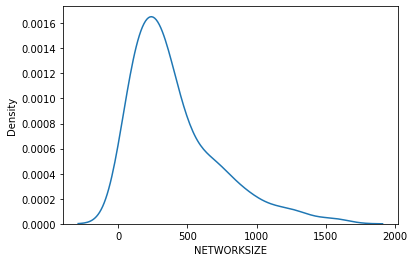

In [ ]:
sns.kdeplot(df['NETWORKSIZE']);

In [ ]:
np.median(df['NETWORKSIZE'])

315.0

In [ ]:
rho, p = pearsonr(df['sEXT'], df['NETWORKSIZE'])
rho, p

(0.3621394116038834, 3.664654662842724e-09)

In [ ]:
f'{p:.10f}'

'0.0000000037'

In [ ]:
# Neuroticismo
pearsonr(df['sNEU'], df['NETWORKSIZE'])

(-0.18020241658633415, 0.004257725510543998)

In [ ]:
# Amabilidad
pearsonr(df['sAGR'], df['NETWORKSIZE'])

(0.11133128697465432, 0.07892697855400191)

In [ ]:
fig = px.scatter(df, x="sEXT", y="NETWORKSIZE", trendline="ols", trendline_color_override='red', title='Extroversión')
fig.show();

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Vectores

## Definición

Un vector es una cantidad definida por una magnitud y una dirección. Por ejemplo, la velocidad de un cohete es un vector tridimensional: su magnitud es la velocidad del cohete y su dirección es (con suerte) hacia arriba. Un vector se puede representar mediante una matriz de números llamados *escalares*. Cada escalar corresponde a la magnitud del vector con respecto a cada dimensión.

Por ejemplo, digamos que el cohete sube en un ligero ángulo: tiene una velocidad vertical de 5.000 m/s, y también una ligera velocidad hacia el Este a 10 m/s, y una ligera velocidad hacia el Norte a 50 m/s. La velocidad del cohete se puede representar mediante el siguiente vector:

**velocidad** $= \begin{pmatrix}
10 \\
50 \\
5000 \\
\end{pmatrix}$

Nota: por convención, los vectores generalmente se presentan en forma de columnas. Además, los nombres de los vectores generalmente están en minúsculas para distinguirlos de las matrices (que discutiremos a continuación) y en negrita (cuando sea posible) para distinguirlos de valores escalares simples como ${metros\_per\_segundo} = 5026$.

Una lista de N números también puede representar las coordenadas de un punto en un espacio de N dimensiones, por lo que es bastante frecuente representar vectores como puntos simples en lugar de flechas. Un vector con 1 elemento puede representarse como una flecha o un punto en un eje, un vector con 2 elementos es una flecha o un punto en un plano, un vector con 3 elementos es una flecha o un punto en el espacio y un vector con N elementos es una flecha o un punto en un espacio de N dimensiones ... que la mayoría de la gente encuentra difícil de imaginar.


##  Propósito

Los vectores tienen muchos propósitos en Machine Learning, sobre todo para representar observaciones y predicciones. Por ejemplo, supongamos que creamos un sistema de aprendizaje automático para clasificar videos en 3 categorías(bueno, spam, clickbait) según lo que sabemos sobre ellos. Para cada video, tendríamos un vector que representa lo que sabemos sobre él, como por ejemplo:

**video** $= \begin{pmatrix}
10.5 \\
5.2 \\
3.25 \\
7.0
\end{pmatrix}$

Este vector podría representar un video que dura 10.5 minutos, pero solo el 5.2% de los espectadores miran durante más de un minuto, obtiene 3.25 visualizaciones por día en promedio y se marcó 7 veces como spam. Como se puede ver, cada eje puede tener un significado diferente.

Con base en este vector, nuestro sistema de aprendizaje automático puede predecir que existe un 80% de probabilidad de que sea un video spam, un 18% de que sea un clickbait y un 2% de que sea un buen video. Esto podría representarse como el siguiente vector:

**class_probabilities** $= \begin{pmatrix}
0.80 \\
0.18 \\
0.02
\end{pmatrix}$

## Vectores en python
En Python, un vector se puede representar de muchas maneras, la más simple es una lista regular de números de Python:

In [ ]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

Dado que planeamos hacer bastantes cálculos científicos, es mucho mejor usar `ndarray` de NumPy, que proporciona muchas implementaciones convenientes y optimizadas de operaciones matemáticas esenciales en vectores (para obtener más detalles sobre NumPy, consulte la [NumPy tutorial](tools_numpy.ipynb)). Por ejemplo:

In [ ]:
import numpy as np

video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

El tamaño de un vector se puede obtener usando el atributo `size`:

In [ ]:
video.size

4

El elemento $i^{th}$ (también llamado *entrada* o *elemento*; *entry* or *item*) de un vector $\textbf{v}$ se anota $\textbf{v}_i$.

Tené en cuenta que los índices en matemáticas generalmente comienzan en 1, pero en programación generalmente comienzan en 0. Entonces, para acceder a $\textbf{video}_3$ programáticamente, escribiríamos:

In [ ]:
video[2]  # Tercer elemento

3.25

## "Ploteando" vectores

Para graficar vamos a usar matplotlib. Para más detalles pueden consultar [este tutorial](tools_matplotlib.ipynb)):

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

### Vectores 2D

Vamos a creer un par de vectores 2D muy simples para trazar:

In [ ]:
u = np.array([2, 5])
v = np.array([3, 1])

Cada uno de estos vectores tiene 2 elementos, por lo que se pueden representar fácilmente gráficamente en un gráfico 2D, por ejemplo, como puntos:

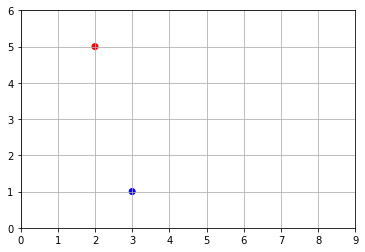

In [ ]:
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Los vectores también se pueden representar como flechas. Vamos a crear una pequeña función de conveniencia para dibujar flechas lindas:

In [ ]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

Ahora dibujemos los vectores **u** y **v** como flechas:

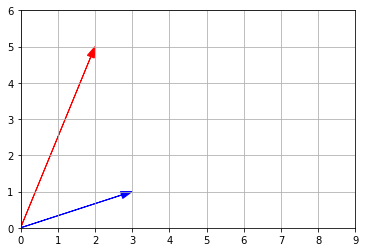

In [ ]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

## Norma
La norma de un vector $\textbf{u}$, anotado $\left \Vert \textbf{u} \right \|$, es una medida de la longitud (también conocida como la magnitud) de $\textbf{u}$. Hay múltiples normas posibles, pero la más común (y la única que discutiremos aquí) es la norma euclidiana, que se define como:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

Podríamos implementar esto fácilmente en python puro, recordando que $\sqrt x = x^{\frac{1}{2}}$

In [ ]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [2 5] || =


5.385164807134504

Sin embargo, es mucho más eficiente usar la función `norm` de NumPy, disponible en el módulo` linalg` (**Lin**ear **Alg**ebra):

In [ ]:
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

Vamos a plotear un pequeño diagrama para confirmar que la longitud del vector $\textbf{v}$ es de hecho $\approx5.4$:



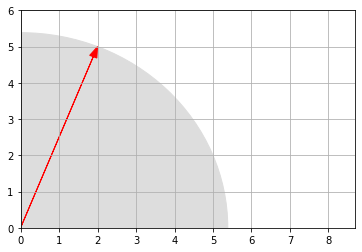

In [ ]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

¡Parece que está bien!

## Suma
Vectores de la misma dimensión pueden ser sumados, elemento por elemento.

In [ ]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Ilustremos como se ve:

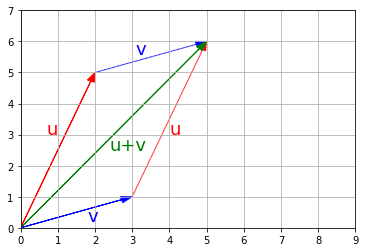

In [ ]:
#@title Suma de vectores

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

## Multiplicación por un escalar

Podemos multiplicar un vector por un escalar

In [ ]:
print("1.5 *", u, "=")

1.5 * u

1.5 * [2 5] =


array([3. , 7.5])

La multiplicación por un escalar cambia la escala de la figura, por eso la nomenclatura.

Probemos multiplicando por 2.5.

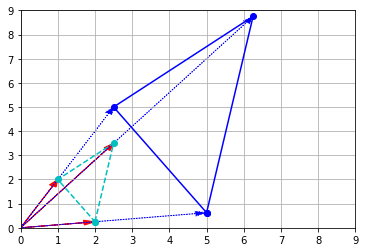

In [ ]:
#@title Multiplicación por escalar

t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])
x_coords, y_coords = zip(t1, t2, t3, t1)

k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.grid()
plt.show()

# Matrices

Una matriz es una arreglo rectangular de escalares (cualquier número), ordenado en filas y columnas:

\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}

Podemos pensar a una matriz como una lista de vectores. 

Las matrices son un modo conveniente y eficiente de aplicar operaciones sobre vectores, y representando transformaciones sobre los mismos como rotaciones, traslaciones o escalado. 

## Matrices en Python


Para representar una matriz, podemos usar una lista de listas:



In [ ]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

Una manera preferible es usar la librería NumPy:

In [ ]:
A = np.array([
    [10,20,30],
    [40,50,60],
    [20,50,70]
])
A

array([[10, 20, 30],
       [40, 50, 60],
       [20, 50, 70]])

Por convención, llamamos a las matrices con mayúsculas: $A$.

## Tamaño

El tamaño de una matriz se define por el número de filas y columnas, $filas \times columnas$.

Por ejemplo, la matriz $A$ de arriba es una matriz de $2 \times 3$ matrix: 2 filas, 3 columnas. 

Veamos el tamaño con NumPy:

In [ ]:
A.shape

(2, 3)

Ojo! El atributo `size` representa la cantidad de elementos en el array.

In [ ]:
A.size

6

## Indexando Matrices

El número ubicado en la fila $i^{th}$ y columna $j^{th}$ de la matriz $X$ lo denominamos $X_{i,j}$ o $X_{ij}$

$X = \begin{bmatrix}
  x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
  x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
  x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$


Ojo! En general los índices arrancan en 1, pero en programación se arranca de 0!

Para acceder a $A_{2,3}$, escribimos:

In [ ]:
A[1,2]  # 2da fila, 3ra columna

60

El vector fila $i^{th}$ se denomina $X_i$ o $X_{i,*}$

En Python, vamos a acceder con: $A_{2,*}$ (2do vector de $A$)

In [ ]:
A[1, :]  # 2do vector fila de A

array([40, 50, 60])

De modo similar para las columnas:

In [ ]:
A[:, 2]  # 3ra columna de A

array([30, 60])

In [ ]:
A[:, 1:3]  # columnas 2 a 4

array([[20, 30],
       [50, 60]])

In [ ]:
A[0, :] # fila 3, columna 2

array([10, 20, 30])

# Ejemplo: Social Listening

Con esta herramienta podemos buscar los últimos N tweets de un usuario O de un hashtag, ver en qué temas se agrupan.

Instrucciones:

- Darle play a la primera celda
- Resetear: en el menu, elegir Runtime -> Restart runtime
- Poner los parámetros que se quieran (usuario y cantidad de tweets) y ejecutar!

Aclaración: puede tardar unos ~2-5 minutos, en especial la primera vez que se ejecuta.)

In [ ]:
#@title Darle play a esta celda y cuando termina, clickear en el menú "Runtime" o "Entorno de Ejecución" y "Restart Runtime" o "Reiniciar entorno de ejecución"  
%%capture
# Instalamos twint para bajar tweets
!pip3 install --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip3 install --upgrade aiohttp_socks
!pip install tweet-preprocessor
!pip install umap-learn
!pip install sentence_transformers
!pip install hdbscan
!pip install transformers

In [ ]:
buscar_por = "usuario"  # @param ["usuario", "hashtag"]
usuario = "UniversidadC"  # @param {type:"string"}
hashtag = ""  # @param {type:"string"}
desde = "2019-01-01"  # @param {type:"date"}
desde = desde + ' 00:00:00'
idioma = "es"  # @param ["en", "es"]
n = 1000  # @param {type:"integer"}
download_csv = False  

if idioma == "es":
    sentiment_model = "mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es"
elif idioma == "en":
    sentiment_model = "distilbert-base-uncased-finetuned-sst-2-english"
else:
    sentiment_model = "nlptown/bert-base-multilingual-uncased-sentiment"

import time
import re
import textwrap
import hdbscan
import nest_asyncio
import numpy as np
import seaborn as sns

# Hay que reiniciar la colab. Luego de eso, importamos
import twint
import umap
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import pandas as pd
import plotly.graph_objects as go
import preprocessor as p

from transformers import pipeline
from io import BytesIO
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import requests as rq
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator, WordCloud
from IPython.utils import io

nest_asyncio.apply()
pd.options.mode.chained_assignment = None
now = time.strftime("%Y-%m-%d %H:%M:%S")

def make_cloud(text, img_url=None, width=800, height=800, plot=True, min_font_size=10):
    mask = None

    if img_url:
        mask = np.array(Image.open(BytesIO(rq.get(img_url).content)))
        mask[mask > 250] = 255
        image_colors = ImageColorGenerator(mask)
        width = mask.shape[1]
        height = mask.shape[0]

    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color="white",
        stopwords=stopwords,
        random_state=42,
        min_font_size=min_font_size,
        mask=mask,
        color_func=image_colors if img_url else None,
    ).generate(text)

    if plot:
        plt.figure(figsize=(6, 6))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()

    return wordcloud

def c_tf_idf(documents, m, ngram_range=(1, 1), stop_words="spanish"):
    count = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words).fit(
        documents
    )
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count


def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.cluster)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {
        label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1]
        for i, label in enumerate(labels)
    }
    return top_n_words


def plot_clusters(all_coords: pd.DataFrame, clusters):
    """all_coords should have title, text, cluster, and color cols. Constructed like:

    all_coords = pd.DataFrame(data = reduced, columns = ['x', 'y','z'])
    all_coords['title'] = labels
    all_coords['text'] = data
    all_coords['cluster'] = clusters"""
    fig = go.Figure()

    # Group titles and get top N words per cluster
    docs_per_topic = all_coords.groupby(["cluster"], as_index=False).agg(
        {"text": " ".join}
    )
    tf_idf, count = c_tf_idf(docs_per_topic.text.values, m=len(clusters), stop_words=[])
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=15)
    # pprint({k: [w for w,r in v] for k,v in top_n_words.items()}, compact=True)

    # @title 3D Plot
    max_labels = 3
    words_per_cluster = {
        n: [p for p, score in l[:max_labels]] for n, l in top_n_words.items()
    }

    # Clusters
    for c in np.unique(clusters):
        coords = all_coords[all_coords.cluster == c]
        fig.add_trace(
            go.Scatter3d(
                x=coords["x"],
                y=coords["y"],
                z=coords["z"],
                mode="markers",
                marker_size=8,
                marker_line_width=1,
                name=f"Cº{str(c)}: {'<br>'.join(textwrap.wrap(' '.join(words_per_cluster[c]), width=50))}",
                marker_color=coords["color"],
                text=coords["text"].apply(
                    lambda txt: "<br>".join(textwrap.wrap(txt, width=50))
                ),
                hoverinfo="text",
            )
        )
    return fig


def get_hashtag(hashtag, until=now, since=desde, n=None):
    c = twint.Config()
    c.Profile_full = True
    c.Pandas = True
    c.Search = hashtag
    c.Show_hashtags = True
    c.Until = until
    c.Since = since
    c.Count = True
    c.Retweets = True
    c.Hide_output = True
    if n:
        c.Limit = n

    c.Store_csv = True
    c.Output = until + " to " + since + ".csv"

    twint.run.Search(c)
    tweets = twint.output.panda.Tweets_df[["date", "tweet", "hashtags"]]
    return tweets


def get_user(user, until=now, since=desde, n=None):
    # Descargamos tweets
    c = twint.Config()
    c.Username = user
    c.Until = until
    c.Since = since
    c.Hide_output = True
    c.Pandas = True
    if n:
        c.Limit = n
    twint.run.Search(c)
    tweets = twint.output.panda.Tweets_df[["date", "tweet", "hashtags"]]
    return tweets

print("Descargando Tweets...")

if buscar_por == "usuario":
    func = get_user
    query = usuario
else:
    func = get_hashtag
    query = hashtag

tweets = func(query, n=n)
print(f'Got {tweets.shape[0]} tweets')
if download_csv:
    # Descargar csv a local
    tweets.to_csv(f"{user}.csv")
    from google.colab import files

    files.download(f"{user}.csv")
  

print("Despertando IAs...")
with io.capture_output() as captured:
    sentence_transformers_model = (
        "sentence-transformers/distilbert-multilingual-nli-stsb-quora-ranking"
    )
    model = SentenceTransformer(sentence_transformers_model)
    #get_sentiment = pipeline("sentiment-analysis", model=sentiment_model)

print("Procesando...")
tweets["tweet"] = tweets.apply(lambda x: p.clean(x["tweet"]), axis=1)

# Por tweets iguales con distintas URLs
tweets = tweets.drop_duplicates("tweet")
tweets = tweets.loc[(tweets["tweet"].str.len() > 1), :]

embeddings = model.encode(tweets["tweet"].tolist())
reducer = umap.UMAP(n_components=3).fit(embeddings)
umap_embeddings = reducer.transform(embeddings)
cluster = hdbscan.HDBSCAN().fit(umap_embeddings)

data = tweets["tweet"].tolist()
clusters = cluster.labels_

all_coords = pd.DataFrame(data=umap_embeddings, columns=["x", "y", "z"])
all_coords["text"] = data
all_coords["cluster"] = clusters

# for style in ['YlGnBu']:
style = "viridis_r"
# We generate a list of colors
palette = sns.color_palette(style, n_colors=len(np.unique(clusters)) + 1).as_hex()
all_coords["color"] = [palette[i] for i in clusters]

fig = plot_clusters(all_coords, clusters)
fig.update_layout(
    width=1000,
    height=800,
    autosize=False,
    showlegend=True,
    scene={"aspectmode": "cube"},
)
fig.show()

Descargando Tweets...
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
Got 243 tweets
Despertando IAs...
Procesando...


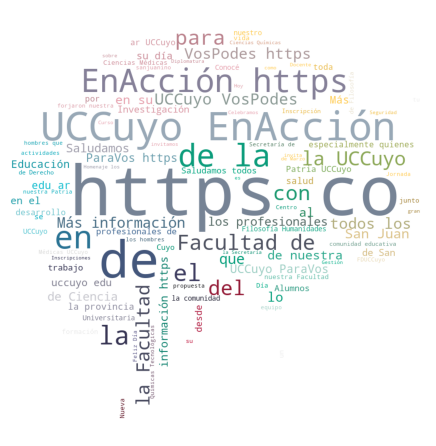

In [ ]:
#@title Word Cloud
img_url = "https://toppng.com/uploads/preview/human-brain-png-high-quality-image-brain-clipart-115630224411rqb2dvotv.png"
text = " ".join(twint.output.panda.Tweets_df["tweet"].tolist())
make_cloud(text, img_url);

In [ ]:
df = pd.read_csv('https://unket.s3-sa-east-1.amazonaws.com/data/tweets_uccuyo.csv')

In [ ]:
df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1394679059943206915,1394679059943206915,1.621352e+12,2021-05-18 15:39:34,0,NaN,18 de Mayo 🏫Día Internacional de los Museos ...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,2,15,https://twitter.com/UniversidadC/status/139467...,[],['https://pbs.twimg.com/media/E1rlNEqWEAozk6Y....,1,https://pbs.twimg.com/media/E1rlNEqWEAozk6Y.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1394493325407932417,1394493325407932417,1.621308e+12,2021-05-18 03:21:31,0,NaN,🇦🇷¡Viva la Patria! #UCCuyo #ParaVos https://...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,2,3,https://twitter.com/UniversidadC/status/139449...,[],['https://pbs.twimg.com/media/E1o8RqlXoAI8CP_....,1,https://pbs.twimg.com/media/E1o8RqlXoAI8CP_.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1393584430590177280,1393584430590177280,1.621091e+12,2021-05-15 15:09:54,0,NaN,Hoy‼️ 👥🎶 Coro Universitario UCCuyo ¡Te espe...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,6,15,https://twitter.com/UniversidadC/status/139358...,[],['https://pbs.twimg.com/media/E1cBpVXWYA0J6IV....,1,https://pbs.twimg.com/media/E1cBpVXWYA0J6IV.jpg,False,1,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1392502685463715846,1392502685463715846,1.620833e+12,2021-05-12 15:31:26,0,NaN,👩🏻‍⚕️🩹👨🏽‍⚕️Feliz día a todos los profesionales...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,3,15,https://twitter.com/UniversidadC/status/139250...,[],['https://pbs.twimg.com/media/E1MpzYeXMAEfM8E....,1,https://pbs.twimg.com/media/E1MpzYeXMAEfM8E.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1392173708282933253,1392173708282933253,1.620755e+12,2021-05-11 17:44:12,0,NaN,🏥Desde la Facultad de Ciencias Medicas-UCCuyo ...,es,"['uccuyo', 'paravos']",[],370129152,370129152,UniversidadC,Universidad Católica de Cuyo,2,17,https://twitter.com/UniversidadC/status/139217...,['https://zoom.us/j/97080525865'],['https://pbs.twimg.com/media/E1H-maMWEAI42Ty....,1,https://pbs.twimg.com/media/E1H-maMWEAI42Ty.jpg,False,0,0,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Material extra álgebra lineal:

https://colab.research.google.com/github/ageron/handson-ml2/blob/master/math_linear_algebra.ipynb
